In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [244]:
df= pd.read_csv(r"C:\Users\Aishwarya\Downloads\bengaluru_house_prices.csv")

In [245]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [246]:
df.shape

(13320, 9)

In [247]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [248]:
le= LabelEncoder()

In [249]:
df['area_type']=le.fit_transform(df['area_type'])

In [6]:
#df.replace({'area_type':{'Super built-up  Area':0, 'Plot  Area':1, 'Built-up  Area':2, 'Carpet  Area':3}}, inplace= True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_10784\2858449923.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'area_type':{'Super built-up  Area':0, 'Plot  Area':1, 'Built-up  Area':2, 'Carpet  Area':3}}, inplace= True)


In [250]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [251]:
df= df.dropna(subset=['society'])

In [252]:
df.shape

(7818, 9)

In [253]:
society_price= df.groupby('society')['price'].mean()
df['society_target_encoding']= df['society'].map(society_price)

In [254]:
df.drop(['society'], axis=1,inplace=True)

In [255]:
df= df.replace(np.nan, '')

In [256]:
s= SimpleImputer(missing_values='', strategy='most_frequent')

In [257]:
df[['size']]=s.fit_transform(df[['size']])

In [258]:
df[['bath']]=s.fit_transform(df[['bath']])

In [259]:
df[['balcony']]=s.fit_transform(df[['balcony']])

In [260]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '3 Bedroom', '1 RK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '6 Bedroom',
       '2 Bedroom', '9 Bedroom', '6 BHK', '7 BHK', '10 Bedroom',
       '8 Bedroom', '18 Bedroom'], dtype=object)

In [261]:
df.replace({'size':{'2 BHK':2, '4 Bedroom':4, '3 BHK':3, '4 BHK':4, '6 Bedroom':6, '3 Bedroom':3,
       '1 BHK':1, '1 RK':0, '1 Bedroom':1, '8 Bedroom':8, '2 Bedroom':2,
       '7 Bedroom':7, '5 BHK':5, '7 BHK':7, '6 BHK':6, '5 Bedroom':5, '11 BHK':11,
       '9 BHK':9 , '9 Bedroom':9, '27 BHK':27, '10 Bedroom':10, '11 Bedroom':11,
       '10 BHK':10, '19 BHK':19, '16 BHK':16, '43 Bedroom':43, '14 BHK':14, '8 BHK':8,
       '12 Bedroom':12, '13 BHK':13, '18 Bedroom':18}}, inplace= True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_10784\3178637292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'size':{'2 BHK':2, '4 Bedroom':4, '3 BHK':3, '4 BHK':4, '6 Bedroom':6, '3 Bedroom':3,


In [262]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Nov', '17-Oct', '21-Dec',
       '19-Sep', '20-Sep', '18-Mar', '20-Feb', '18-Apr', '20-Aug',
       '18-Oct', '19-Mar', '17-Sep', '17-Aug', '19-Apr', '22-Dec',
       '18-Aug', '19-Jan', '17-Jul', '18-Jul', '18-Dec', '21-Jun',
       '18-Sep', '17-May', '17-Jun', '21-May', '20-Dec', '18-Jun',
       '16-Mar', '22-Jun', '17-Dec', '21-Feb', 'Immediate Possession',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '18-Feb', '19-Feb',
       '21-Oct', '21-Jan', '17-Mar', '19-Jun', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '19-Jul', '20-Jan',
       '21-Sep', '18-Jan', '20-Mar', '19-Nov', '15-Nov', '15-Jun',
       '19-Aug', '20-May', '20-Nov', '20-Jul', '15-Oct', '15-Dec',
       '21-Aug', '16-Oct', '22-Nov', '16-Dec', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '22-Jan', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [263]:
df['availability']= pd.to_datetime(df['availability'], format='%d-%b',errors='coerce')

In [264]:
df['availability']=df['availability'].dt.month

In [265]:
df=df.replace(np.nan,0)

In [266]:
df.isnull().sum()

area_type                  0
availability               0
location                   0
size                       0
total_sqft                 0
bath                       0
balcony                    0
price                      0
society_target_encoding    0
dtype: int64

In [267]:
df['availability']=df['availability'].astype(int)

In [268]:
df['availability'].unique()

array([12,  0,  5, 11, 10,  9,  3,  2,  4,  8,  1,  7,  6])

In [269]:
df['size']= df['size'].astype(int)

In [270]:
df['total_sqft']= pd.to_numeric(df['total_sqft'], errors='coerce')

In [271]:
df= df.replace(np.nan,'')

In [272]:
df[['total_sqft']]=s.fit_transform(df[['total_sqft']])

In [273]:
mean_price= df.groupby('location')['price'].mean()
df['location_target_encoded']=df['location'].map(mean_price)

In [274]:
df.drop(['location'], axis=1, inplace=True)

In [275]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,society_target_encoding,location_target_encoded
0,3,12,2,1056.0,2.0,1.0,39.07,53.810000,45.340167
1,2,0,4,2600.0,5.0,3.0,120.00,121.615385,118.662143
3,3,0,3,1521.0,3.0,1.0,95.00,116.895455,115.348261
5,3,0,2,1170.0,2.0,1.0,38.00,38.000000,128.533019
6,3,5,4,2732.0,4.0,2.0,204.00,203.034211,177.426000


In [276]:
df.shape

(7818, 9)

In [277]:
df['total_sqft']=df['total_sqft'].astype(int)
df['bath']=df['bath'].astype(int)

In [278]:
df['balcony']=df['balcony'].astype(int)

In [279]:
y= df['price']
x= df.drop(['price'], axis=1)

In [317]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [318]:
print(x)

       area_type  availability  size  total_sqft  bath  balcony  \
0              3            12     2        1056     2        1   
1              2             0     4        2600     5        3   
3              3             0     3        1521     3        1   
5              3             0     2        1170     2        1   
6              3             5     4        2732     4        2   
...          ...           ...   ...         ...   ...      ...   
13313          3             0     3        1345     2        1   
13314          3             0     3        1715     3        3   
13315          0             0     5        3453     4        0   
13317          0             0     2        1141     2        1   
13318          3             6     4        4689     4        1   

       society_target_encoding  location_target_encoded  
0                    53.810000                45.340167  
1                   121.615385               118.662143  
3                   1

In [319]:
print(y)

0         39.07
1        120.00
3         95.00
5         38.00
6        204.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7818, dtype: float64


In [333]:
lr=LinearRegression()

In [344]:
lr.fit(x_train,y_train)

LinearRegression()

In [345]:
train_data_pred= lr.predict(x_train)

In [346]:
score1= metrics.r2_score(y_train, train_data_pred)
print(score1)

0.895704207886163


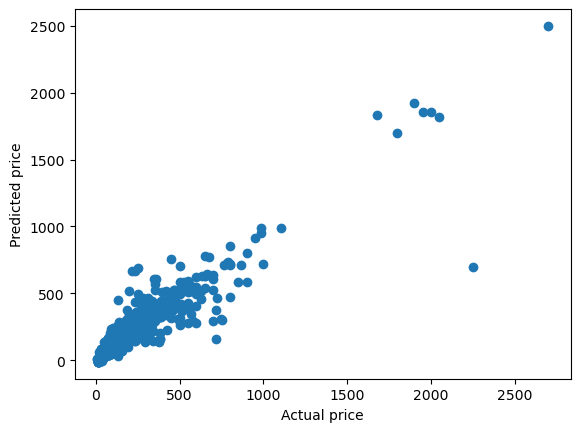

In [347]:
plt.scatter(y_train, train_data_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [348]:
test_data_pred=lr.predict(x_test)

In [349]:
score2=metrics.r2_score(y_test, test_data_pred)
print(score2)

0.9099389051626137


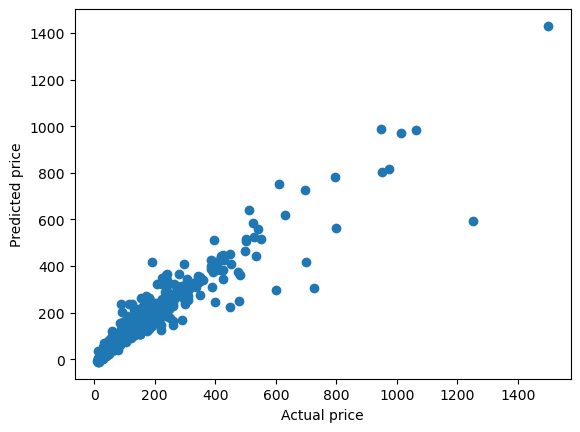

In [350]:
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [351]:
print(lr.predict([[0,12,2,1056,2,1,53.81,45.34]]))

[47.67141628]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [353]:
print(lr.predict([[ 3,0,3,1345,2,1,53.217308,53.390291]]))

[57.86560994]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
